# Análise de dados da final da libertadores entre Botafogo 3 x 1 Atletico MG

### Autor: Victor Miguel de Souza Soares

## Qual é o motivo de fazer essa análise? Quem são os beneficiados?

Os principais beneficiados com uma análise de dados de scouts em uma partida de futebol são os treinadores, jogadores, e equipes técnicas. Os treinadores podem usar os dados para ajustar táticas, identificar pontos fortes e fracos do time adversário e tomar decisões estratégicas em tempo real. Para os jogadores, os scouts ajudam a entender seu desempenho individual, destacando áreas para melhorar e contribuindo para a evolução técnica e física. Já as equipes técnicas podem aproveitar essas informações para planejar treinamentos mais eficazes, prevenir lesões e otimizar o desempenho coletivo. Além disso, analistas esportivos e gestores também podem usar os dados para tomadas de decisões relacionadas a contratações e investimentos.

## Como conseguir dados relevantes para análise?
Para realizar uma análise eficaz de uma partida de futebol, é fundamental obter dados relevantes e precisos, que possam fornecer insights sobre o desempenho das equipes e jogadores, mas como consegui-los? A técnica de web scraping surge como uma solução eficiente para coletar esses dados automaticamente de sites especializados, transformando informações não estruturadas em dados organizados e úteis.

Nesta análise de dados, foram utilizadas três abordagens diferentes de web scraping para obter dados do site Sofascore sobre a final da Libertadores entre Atlético MG x Botafogo realizada em 30/11/2024 às 17:00.

# Visão geral da partida

### Através da técnica de webscraping, os dados dos site sofascore serão extraídos e armazenados em um Data Frame para seu tratamento e análise

In [46]:
# Importando bibliotecas

import pandas as pd
import requests

#### Puxando dados com webscraping

In [47]:
url = "https://www.sofascore.com/api/v1/event/12375366/statistics"

# header simulando navegador
header = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:134.0) Gecko/20100101 Firefox/134.0"
}

response = requests.get(url, headers=header)

if response.status_code == 200:
    data = response.json()

    all_data = []

    for match_stats in data['statistics']:
        period = match_stats['period']

        for group in match_stats['groups']:
            group_name = group['groupName']

            for item in group['statisticsItems']:
                stat_name = item.get('name')
                home_value = item.get('home')
                away_value = item.get('away')

                all_data.append({
                    'Period' : period,
                    'Group' : group_name,
                    'Statistics' : stat_name,
                    'Home' : home_value,
                    'Away' : away_value

                })

# Cria dataframe
df = pd.DataFrame(all_data)
arquivo_excel = 'futebol_stats.xlsx'
df.to_excel(arquivo_excel, index=False)

print(f'Dados exportados para {arquivo_excel}')

Dados exportados para futebol_stats.xlsx


In [48]:
# Observando df criado
df

,Period,Group,Statistics,Home,Away
0,ALL,Match overview,Ball possession,80%,20%
1,ALL,Match overview,Expected goals,1.72,1.81
2,ALL,Match overview,Big chances,3,3
3,ALL,Match overview,Total shots,22,8
4,ALL,Match overview,Goalkeeper saves,1,3
...,...,...,...,...,...
123,2ND,Defending,Interceptions,2,1
124,2ND,Defending,Recoveries,19,12
125,2ND,Defending,Clearances,6,22
126,2ND,Goalkeeping,Total saves,0,1


In [49]:
df.info()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Period      128 non-null    object
 1   Group       128 non-null    object
 2   Statistics  128 non-null    object
 3   Home        128 non-null    object
 4   Away        128 non-null    object
dtypes: object(5)
memory usage: 5.1+ KB


Index(['Period', 'Group', 'Statistics', 'Home', 'Away'], dtype='object')

## Tratando df
### Nota-se que as colunas são do tipo object, e é necessário padronizá-las para um tipo inteiro para sua manipulação

In [50]:
# Função que converte colunas para tipo float e formata colunas com porcentagens isoladas e mescladas
import re

def convert_to_float(value):
    """
    Converte valores no formato string para float.
    Aceita formatos como '80%', '141/175 (81%)', e números simples.
    """
    if isinstance(value, str):
        # Extrair a porcentagem caso exista
        match = re.search(r'(\d+)%', value)
        if match:
            return float(match.group(1)) / 100
        # Caso contrário, tente converter diretamente para float
        try:
            return float(value)
        except ValueError:
            return None
    return value

# Aplicar a função nas colunas Home e Away
df['Home'] = df['Home'].apply(convert_to_float)
df['Away'] = df['Away'].apply(convert_to_float)

# Verificar o resultado
df.head()


,Period,Group,Statistics,Home,Away
0,ALL,Match overview,Ball possession,0.80,0.20
1,ALL,Match overview,Expected goals,1.72,1.81
2,ALL,Match overview,Big chances,3.00,3.00
3,ALL,Match overview,Total shots,22.00,8.00
4,ALL,Match overview,Goalkeeper saves,1.00,3.00


In [51]:
# Usando loc para selecionar linhas onde 'Period' é igual a 'ALL', para analisar dados dos dois tempos de uma só vez
result = df.loc[df['Period'] == 'ALL']

display(result)

,Period,Group,Statistics,Home,Away
0,ALL,Match overview,Ball possession,0.80,0.20
1,ALL,Match overview,Expected goals,1.72,1.81
2,ALL,Match overview,Big chances,3.00,3.00
3,ALL,Match overview,Total shots,22.00,8.00
4,ALL,Match overview,Goalkeeper saves,1.00,3.00
5,ALL,Match overview,Corner kicks,7.00,0.00
6,ALL,Match overview,Fouls,12.00,9.00
7,ALL,Match overview,Passes,547.00,141.00
8,ALL,Match overview,Tackles,14.00,12.00
9,ALL,Match overview,Free kicks,9.00,11.00


In [52]:
# Checando transformação
result.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48 entries, 0 to 47
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Period      48 non-null     object 
 1   Group       48 non-null     object 
 2   Statistics  48 non-null     object 
 3   Home        48 non-null     float64
 4   Away        48 non-null     float64
dtypes: float64(2), object(3)
memory usage: 2.2+ KB


## Analisando estatisticas gerais com gráficos de barra

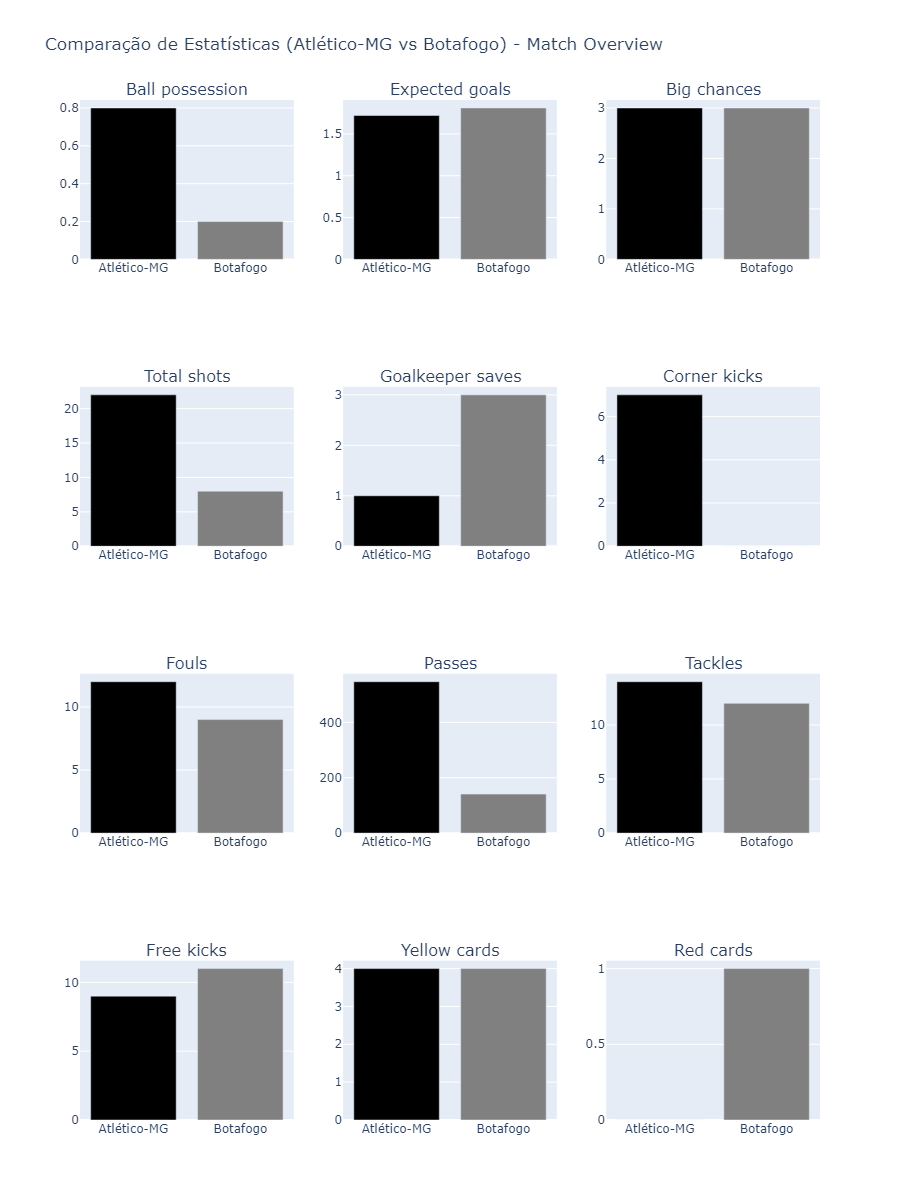

In [53]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Criando a função para gerar múltiplos gráficos em uma única figura interativa
def create_comparative_bar_charts_single_image_plotly(df_tempo_completo_estatisticas_gerais):
    # Filtrar apenas as linhas onde Group é 'Match overview'
    filtered_df = df_tempo_completo_estatisticas_gerais[df_tempo_completo_estatisticas_gerais['Group'] == 'Match overview']

    num_charts = len(filtered_df)
    cols = 3  # Número de colunas na grade
    rows = (num_charts + cols - 1) // cols  # Calcula o número de linhas necessário

    # Criar subplots
    fig = make_subplots(rows=rows, cols=cols, subplot_titles=filtered_df['Statistics'].tolist())

    # Adicionar cada gráfico à grade de subplots
    for i, (index, row) in enumerate(filtered_df.iterrows()):
        col = (i % cols) + 1
        row_idx = (i // cols) + 1

        fig.add_trace(
            go.Bar(
                x=['Atlético-MG', 'Botafogo'], 
                y=[row['Home'], row['Away']],
                marker_color=['black', 'gray'],
                name=row['Statistics']
            ),
            row=row_idx,
            col=col
        )

    # Atualizar layout
    fig.update_layout(
        height=rows * 300,  # Altura total ajustada ao número de linhas
        width=900,  # Largura fixa
        title_text="Comparação de Estatísticas (Atlético-MG vs Botafogo) - Match Overview",
        showlegend=False
    )

    # Exibir a figura
    fig.show()
    # Salvar o gráfico como imagem estática (PNG)
    fig.write_image("graficos_estaticos1.png")

# Gerar os gráficos
create_comparative_bar_charts_single_image_plotly(result)

# Nome do arquivo da imagem
image_path = "graficos_estaticos1.png"

# Exibindo a imagem
display(Image(filename=image_path))


## Informações que podemos tirar dos gráficos:
* O Botafogo entrou na partida como favorito, com uma expectativa de 1,81 gols, superando seu adversário em 0,09
##### Mas o Atlético, apesar do não favoritismo, liderou a maioria das estatísticas. O que pode ter lavado a isso? Isso refletiu no placar?
* Atlético liderou as estatísticas de Passe (547 x 141) ; Desarme (14 x 12) ; Posse de bola (80% x 20%) ; Finalizações (22 x 8) ; Escanteios (7 x 0)

##### Um dos motivadores para esse cenário de jogo adverso as expectativas iniciais pode ser visto no gráfico de cartões vermelhos, onde o Botafogo ficou com menos um jogador desde o início da partida
##### Toda essa vantagem não se traduziu no placar, como isso pode ser explicado?
* É possível perceber que o número de chances perigosas ficou empatado em 3 x 3, o Botafogo se mostrou muito mais eficaz com a bola, uma vez que:
* Precisou 4 vezes à menos de posse de bola em relação ao adversário para converter 3 gols
* Teve uma precisão de 100% nas suas grandes chances, enquanto o Atlético teve um aproveitamento de cerca de 33,33%
* E em relação do aproveitamento ao total de chutes, a diferença é ainda mais gritante, o aproveitamento do Botafogo foi de 37,5%, já o Atlético teve o número de 4,55%

## Gráficos de ataque

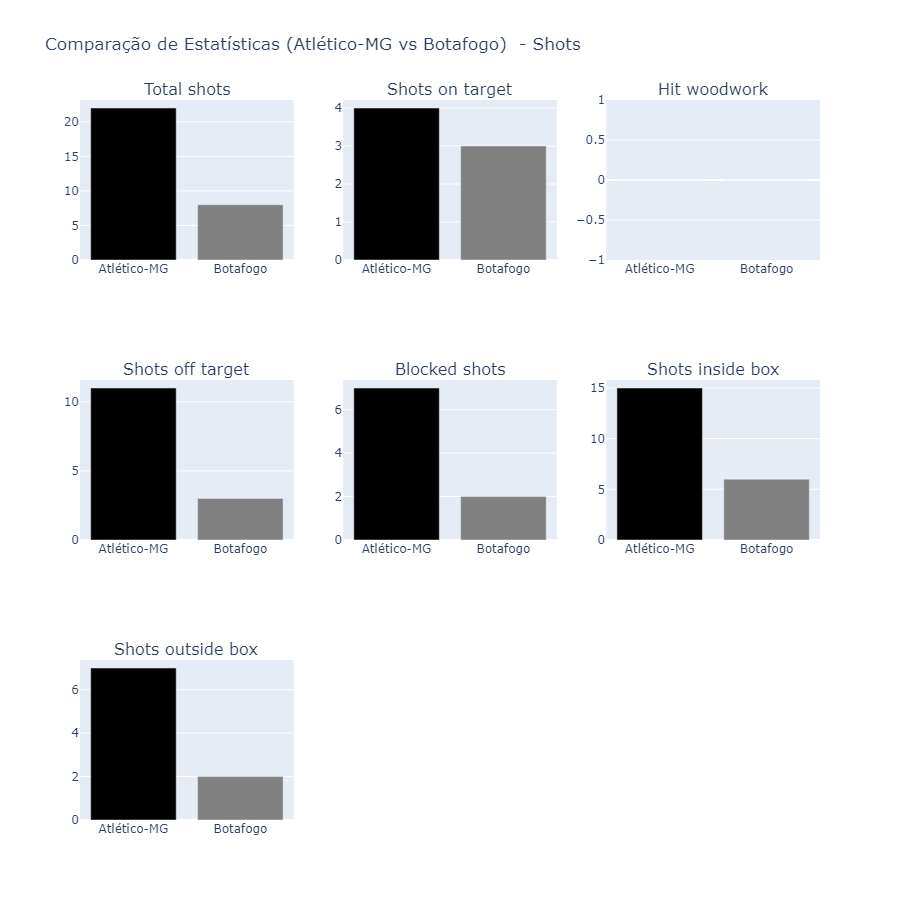

In [63]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Criando a função para gerar múltiplos gráficos em uma única figura interativa
def create_comparative_bar_charts_single_image_plotly(df_tempo_completo_estatisticas_gerais):
    # Filtrar apenas as linhas onde Group é 'Shots'
    filtered_df = df_tempo_completo_estatisticas_gerais[df_tempo_completo_estatisticas_gerais['Group'] == 'Shots']

    num_charts = len(filtered_df)
    cols = 3  # Número de colunas na grade
    rows = (num_charts + cols - 1) // cols  # Calcula o número de linhas necessário

    # Criar subplots
    fig = make_subplots(rows=rows, cols=cols, subplot_titles=filtered_df['Statistics'].tolist())

    # Adicionar cada gráfico à grade de subplots
    for i, (index, row) in enumerate(filtered_df.iterrows()):
        col = (i % cols) + 1
        row_idx = (i // cols) + 1

        fig.add_trace(
            go.Bar(
                x=['Atlético-MG', 'Botafogo'],
                y=[row['Home'], row['Away']],
                marker_color=['black', 'gray'],
                name=row['Statistics']
            ),
            row=row_idx,
            col=col
        )

    # Atualizar layout
    fig.update_layout(
        height=rows * 300,  # Altura total ajustada ao número de linhas
        width=900,  # Largura fixa
        title_text="Comparação de Estatísticas (Atlético-MG vs Botafogo)  - Shots",
        showlegend=False
    )

    # Exibir a figura
    fig.show()
    # Salvar o gráfico como imagem estática (PNG)
    fig.write_image("graficos_estaticos2.png")

# Gerar os gráficos
create_comparative_bar_charts_single_image_plotly(result)

# Nome do arquivo da imagem
image_path = "graficos_estaticos2.png"

# Exibindo a imagem
display(Image(filename=image_path))


## Informações sobre chutes
* Essas informações complementam o aproveitamento precário de 4,55 % do Atlético em chutes convertido em gols.
* Apenas 18,18% dos chutes do Atlético conseguiram alcançar o alvo
* Quase 70%(68,18%) dos chutes do Atlético foram realizados dentro da área, e mesmo estando próximos a meta adversária, não foram convertidos de maneira eficaz. O que demostrou falta de qualidade na conclusão
* Apesar do volume de finalizações do Atlético, equipe mineira teve apenas 1 chute a mais, em relação a equipe Rio de Janeiro
* Cerca de 40%(37,5%) das finalizações do Botafogo chegaram na meta atleticana, demostrando a sua superioridade em objetividade
* A defesa do Botafogo neutralizou 31,81% dos chutes, já a do Atlético 25%

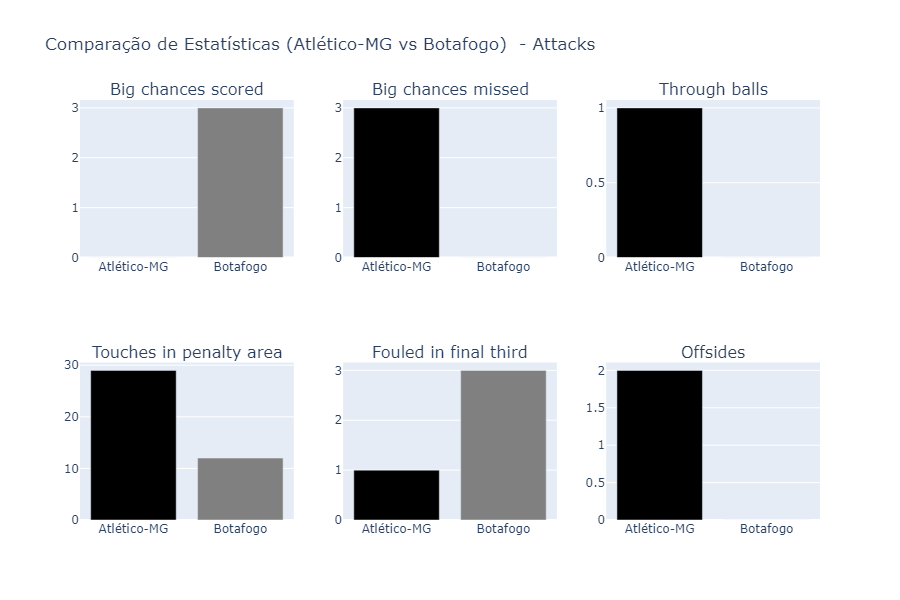

In [55]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Criando a função para gerar múltiplos gráficos em uma única figura interativa
def create_comparative_bar_charts_single_image_plotly(df_tempo_completo_estatisticas_gerais):
    # Filtrar apenas as linhas onde Group é 'Attack'
    filtered_df = df_tempo_completo_estatisticas_gerais[df_tempo_completo_estatisticas_gerais['Group'] == 'Attack']

    num_charts = len(filtered_df)
    cols = 3  # Número de colunas na grade
    rows = (num_charts + cols - 1) // cols  # Calcula o número de linhas necessário

    # Criar subplots
    fig = make_subplots(rows=rows, cols=cols, subplot_titles=filtered_df['Statistics'].tolist())

    # Adicionar cada gráfico à grade de subplots
    for i, (index, row) in enumerate(filtered_df.iterrows()):
        col = (i % cols) + 1
        row_idx = (i // cols) + 1

        fig.add_trace(
            go.Bar(
                x=['Atlético-MG', 'Botafogo'],
                y=[row['Home'], row['Away']],
                marker_color=['black', 'gray'],
                name=row['Statistics']
            ),
            row=row_idx,
            col=col
        )

    # Atualizar layout
    fig.update_layout(
        height=rows * 300,  # Altura total ajustada ao número de linhas
        width=900,  # Largura fixa
        title_text="Comparação de Estatísticas (Atlético-MG vs Botafogo)  - Attacks",
        showlegend=False
    )

    # Exibir a figura
    fig.show()
    # Salvar o gráfico como imagem estática (PNG)
    fig.write_image("graficos_estaticos3.png")

# Gerar os gráficos
create_comparative_bar_charts_single_image_plotly(result)

# Nome do arquivo da imagem
image_path = "graficos_estaticos3.png"

# Exibindo a imagem
display(Image(filename=image_path))


## Informações úteis sobre ataques
* Destaque novamente para eficiência do botafogo, marcando 3 gols em 3 grandes chances criadas
* Destaque negativo para as 3 grandes oportunidades perdidas pelo Atlético
* Mais um destaque do domínio ofensivo ineficente do Atlético na partida foram os 29 toques da equipe Mineira na grande área do Botafogo, sendo mais que o dobro da equipe carioca, que precisou de apenas 12 toques na área adversária para conversão de 3 gols

## Gráficos de passes

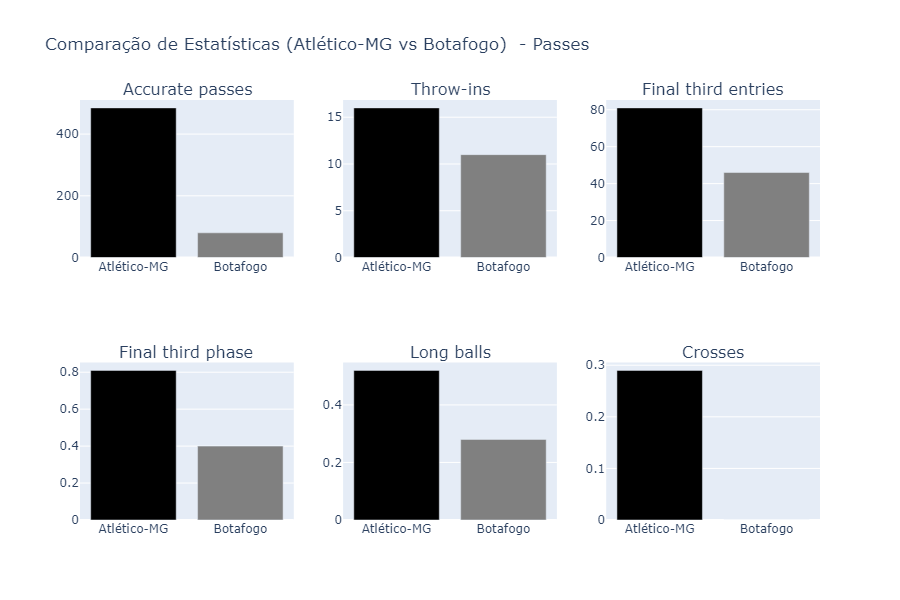

In [56]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Criando a função para gerar múltiplos gráficos em uma única figura interativa
def create_comparative_bar_charts_single_image_plotly(df_tempo_completo_estatisticas_gerais):
    # Filtrar apenas as linhas onde Group é 'Passes'
    filtered_df = df_tempo_completo_estatisticas_gerais[df_tempo_completo_estatisticas_gerais['Group'] == 'Passes']

    num_charts = len(filtered_df)
    cols = 3  # Número de colunas na grade
    rows = (num_charts + cols - 1) // cols  # Calcula o número de linhas necessário

    # Criar subplots
    fig = make_subplots(rows=rows, cols=cols, subplot_titles=filtered_df['Statistics'].tolist())

    # Adicionar cada gráfico à grade de subplots
    for i, (index, row) in enumerate(filtered_df.iterrows()):
        col = (i % cols) + 1
        row_idx = (i // cols) + 1

        fig.add_trace(
            go.Bar(
                x=['Atlético-MG', 'Botafogo'],
                y=[row['Home'], row['Away']],
                marker_color=['black', 'gray'],
                name=row['Statistics']
            ),
            row=row_idx,
            col=col
        )

    # Atualizar layout
    fig.update_layout(
        height=rows * 300,  # Altura total ajustada ao número de linhas
        width=900,  # Largura fixa
        title_text="Comparação de Estatísticas (Atlético-MG vs Botafogo)  - Passes",
        showlegend=False
    )

    # Exibir a figura
    fig.show()
    # Salvar o gráfico como imagem estática (PNG)
    fig.write_image("graficos_estaticos4.png")

# Gerar os gráficos
create_comparative_bar_charts_single_image_plotly(result)

# Nome do arquivo da imagem
image_path = "graficos_estaticos4.png"

# Exibindo a imagem
display(Image(filename=image_path))


# Informações úteis

* Atlético teve um total de 485 passes certos, contra 80 do Botafogo. O que já era esperado pelos números da posse de bola vistos anteriormente
* O Atlético entrou 81 vezes no último terço do campo, enquando o Botafogo entrou apenas 46
* Apenas 28% dos passes longos do Botafogo foram concluídos, demonstrando que o time em muitos momentos ficou limitado em apenas se defender, se desfazendo da posse de bola
* O Botafogo teve sucesso em apenas 40% dos seus passes no último terço de campo, enquanto o Atlético teve o sucesso em 81% deles. O que se pode tirar disso: é o diferencial no potencial de conclusão da equipe carioca foi um desequilibrador da partida, já que conseguiu superar os indicadores da ineficência de passes

## Gráficos de duelos

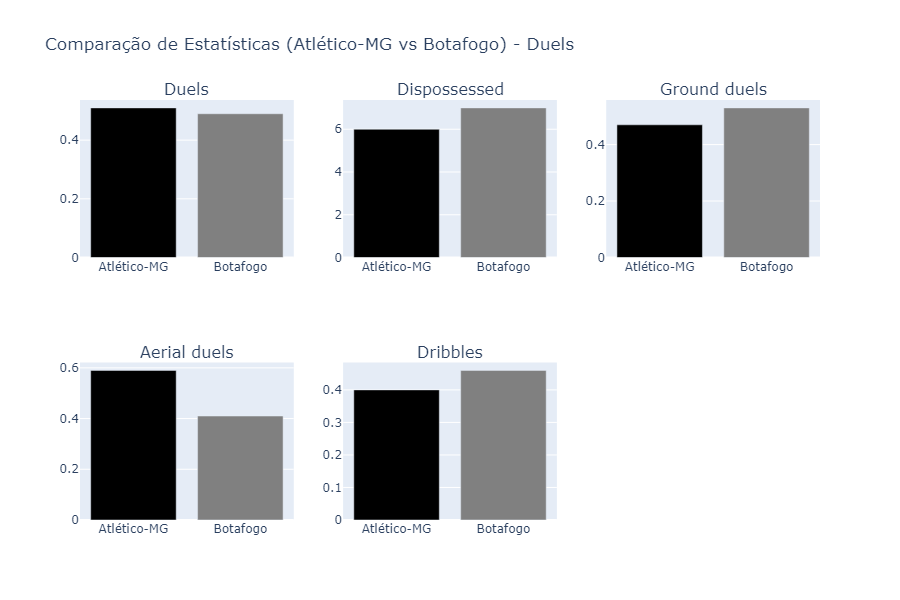

In [57]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Criando a função para gerar múltiplos gráficos em uma única figura interativa
def create_comparative_bar_charts_single_image_plotly(df_tempo_completo_estatisticas_gerais):
    # Filtrar apenas as linhas onde Group é 'Duels'
    filtered_df = df_tempo_completo_estatisticas_gerais[df_tempo_completo_estatisticas_gerais['Group'] == 'Duels']

    num_charts = len(filtered_df)
    cols = 3  # Número de colunas na grade
    rows = (num_charts + cols - 1) // cols  # Calcula o número de linhas necessário

    # Criar subplots
    fig = make_subplots(rows=rows, cols=cols, subplot_titles=filtered_df['Statistics'].tolist())

    # Adicionar cada gráfico à grade de subplots
    for i, (index, row) in enumerate(filtered_df.iterrows()):
        col = (i % cols) + 1
        row_idx = (i // cols) + 1

        fig.add_trace(
            go.Bar(
                x=['Atlético-MG', 'Botafogo'],
                y=[row['Home'], row['Away']],
                marker_color=['black', 'gray'],
                name=row['Statistics']
            ),
            row=row_idx,
            col=col
        )

    # Atualizar layout
    fig.update_layout(
        height=rows * 300,  # Altura total ajustada ao número de linhas
        width=900,  # Largura fixa
        title_text="Comparação de Estatísticas (Atlético-MG vs Botafogo) - Duels",
        showlegend=False
    )

    # Exibir a figura
    fig.show()
    # Salvar o gráfico como imagem estática (PNG)
    fig.write_image("graficos_estaticos5.png")

# Gerar os gráficos
create_comparative_bar_charts_single_image_plotly(result)

# Nome do arquivo da imagem
image_path = "graficos_estaticos5.png"

# Exibindo a imagem
display(Image(filename=image_path))


## Informações sobre duelos no campo

* Um dos fatores que deu poder de combatitividade ao Botafogo na partida mesmo com um homem à menos, foi o equilíbrio nos duelos em campo
* Nos duelos houve a vantagem de apenas 1% para o Atlético, mesmo com 1 homem a mais
* Nos duelos terrestres, Botafogo teve a pequena vantagem de 3%, mas que com 1 homem à menos, fez muita diferença
* Nos duelos áereos, o Atlético se sobressaiu em 9%
* Além disso, também vemos números semelhantes na efetividade de dribles e nas percas de bola, mais uma vez, demontrando o equilíbrio em embates, apesar da diferença numérica em campo

## Gráficos defensivos

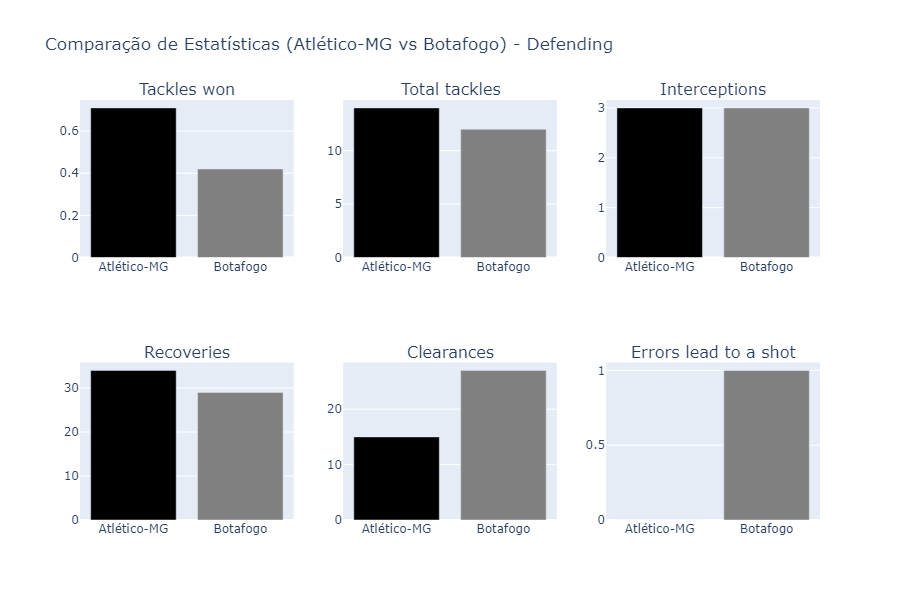

In [58]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Criando a função para gerar múltiplos gráficos em uma única figura interativa
def create_comparative_bar_charts_single_image_plotly(df_tempo_completo_estatisticas_gerais):
    # Filtrar apenas as linhas onde Group é 'Defending'
    filtered_df = df_tempo_completo_estatisticas_gerais[df_tempo_completo_estatisticas_gerais['Group'] == 'Defending']

    num_charts = len(filtered_df)
    cols = 3  # Número de colunas na grade
    rows = (num_charts + cols - 1) // cols  # Calcula o número de linhas necessário

    # Criar subplots
    fig = make_subplots(rows=rows, cols=cols, subplot_titles=filtered_df['Statistics'].tolist())

    # Adicionar cada gráfico à grade de subplots
    for i, (index, row) in enumerate(filtered_df.iterrows()):
        col = (i % cols) + 1
        row_idx = (i // cols) + 1

        fig.add_trace(
            go.Bar(
                x=['Atlético-MG', 'Botafogo'],
                y=[row['Home'], row['Away']],
                marker_color=['black', 'gray'],
                name=row['Statistics']
            ),
            row=row_idx,
            col=col
        )

    # Atualizar layout
    fig.update_layout(
        height=rows * 300,  # Altura total ajustada ao número de linhas
        width=900,  # Largura fixa
        title_text="Comparação de Estatísticas (Atlético-MG vs Botafogo) - Defending",
        showlegend=False
    )

    # Exibir a figura
    fig.show()
    # Salvar o gráfico como imagem estática (PNG)
    fig.write_image("graficos_estaticos6.png")

# Gerar os gráficos
create_comparative_bar_charts_single_image_plotly(result)

# Nome do arquivo da imagem
image_path = "graficos_estaticos6.png"

# Exibindo a imagem
display(Image(filename=image_path))


# Informações sobre desarmes, interceptações, rebatidas e erros

* As duas equipes, mais uma vez, tiverem números parecidos nesses embates
* O total de desarmes, interceptações e recuperações foram muito semelhantes. Destaque para o mesmo número de inteceptações para ambos os lados
* Atlético teve como destaque a eficiência nos seus desarmes, sendo cerca de 40% mais mais efetivo que o Botafogo
* Botafogo teve 12 rebatidas a mais que o Atlético, situação que era esperada pelas diferenças de volume ofensivo
* Aconteceu apenas um erro na partida que ocasionou uma finalização, e foi por parte do Botafogo

## Gráficos de goleiros e últimos recursos defensivos

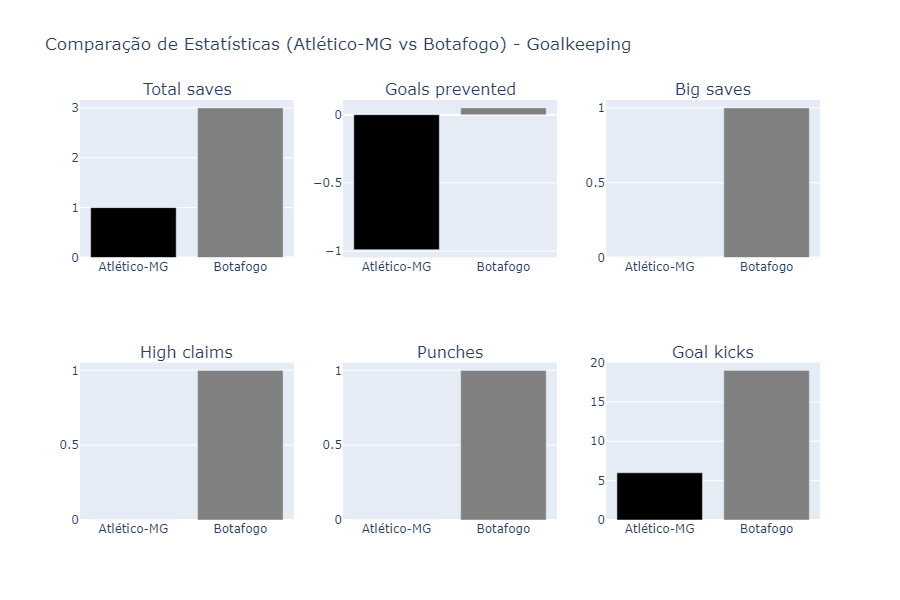

In [59]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from IPython.display import Image, display

# Criando a função para gerar múltiplos gráficos em uma única figura interativa
def create_comparative_bar_charts_single_image_plotly(df_tempo_completo_estatisticas_gerais):
    # Filtrar apenas as linhas onde Group é 'Goalkeeping'
    filtered_df = df_tempo_completo_estatisticas_gerais[df_tempo_completo_estatisticas_gerais['Group'] == 'Goalkeeping']

    num_charts = len(filtered_df)
    cols = 3  # Número de colunas na grade
    rows = (num_charts + cols - 1) // cols  # Calcula o número de linhas necessário

    # Criar subplots
    fig = make_subplots(rows=rows, cols=cols, subplot_titles=filtered_df['Statistics'].tolist())

    # Adicionar cada gráfico à grade de subplots
    for i, (index, row) in enumerate(filtered_df.iterrows()):
        col = (i % cols) + 1
        row_idx = (i // cols) + 1

        fig.add_trace(
            go.Bar(
                x=['Atlético-MG', 'Botafogo'],
                y=[row['Home'], row['Away']],
                marker_color=['black', 'gray'],
                name=row['Statistics']
            ),
            row=row_idx,
            col=col
        )

    # Atualizar layout
    fig.update_layout(
        height=rows * 300,  # Altura total ajustada ao número de linhas
        width=900,  # Largura fixa
        title_text="Comparação de Estatísticas (Atlético-MG vs Botafogo) - Goalkeeping",
        showlegend=False
    )

    # Exibir a figura
    fig.show()
    # Salvar o gráfico como imagem estática (PNG)
    fig.write_image("graficos_estaticos7.png")

# Gerar os gráficos
create_comparative_bar_charts_single_image_plotly(result)

# Nome do arquivo da imagem
image_path = "graficos_estaticos7.png"

# Exibindo a imagem
display(Image(filename=image_path))


# Informações interessantes sobre últimos recursos defensivos

* O goleiro do Botafogo fez 3 defesas, enquanto o do Atlético fez apenas uma
* O goleiro botafoguense conseguiu realizar 1 defesa difícil, evitando uma possível mudança na partida. Já o do Atlético não realizou nenhuma
* Botafogo teve 19 tiros de meta, 13 a mais que o clube mineiro, mostrando a ineficência do ataque do Atlético em acertar a meta adversária


# Mapa de chutes

Através desse mapa é possível visualizar quais foram os padrões de ataque, posicionamento das finalizações bem sucedidas para gol, o comportamento tático, rendimento individual(Permite avaliar o desempenho de jogadores específicos, analisando sua precisão, frequência de finalizações e localização preferida para chutar), deficiências defensivas do adversário e etc.

Analisar um mapa de chutes permite melhorar tanto a abordagem ofensiva quanto a defensiva. Com base nos dados, treinadores podem ajustar treinos para explorar as áreas de maior sucesso ou corrigir comportamentos ineficientes.

Em resumo, o mapa de chutes é uma ferramenta estratégica que vai além da simples contagem de finalizações, possibilitando uma análise profunda de desempenho e ajudando a embasar decisões para o aprimoramento da equipe.

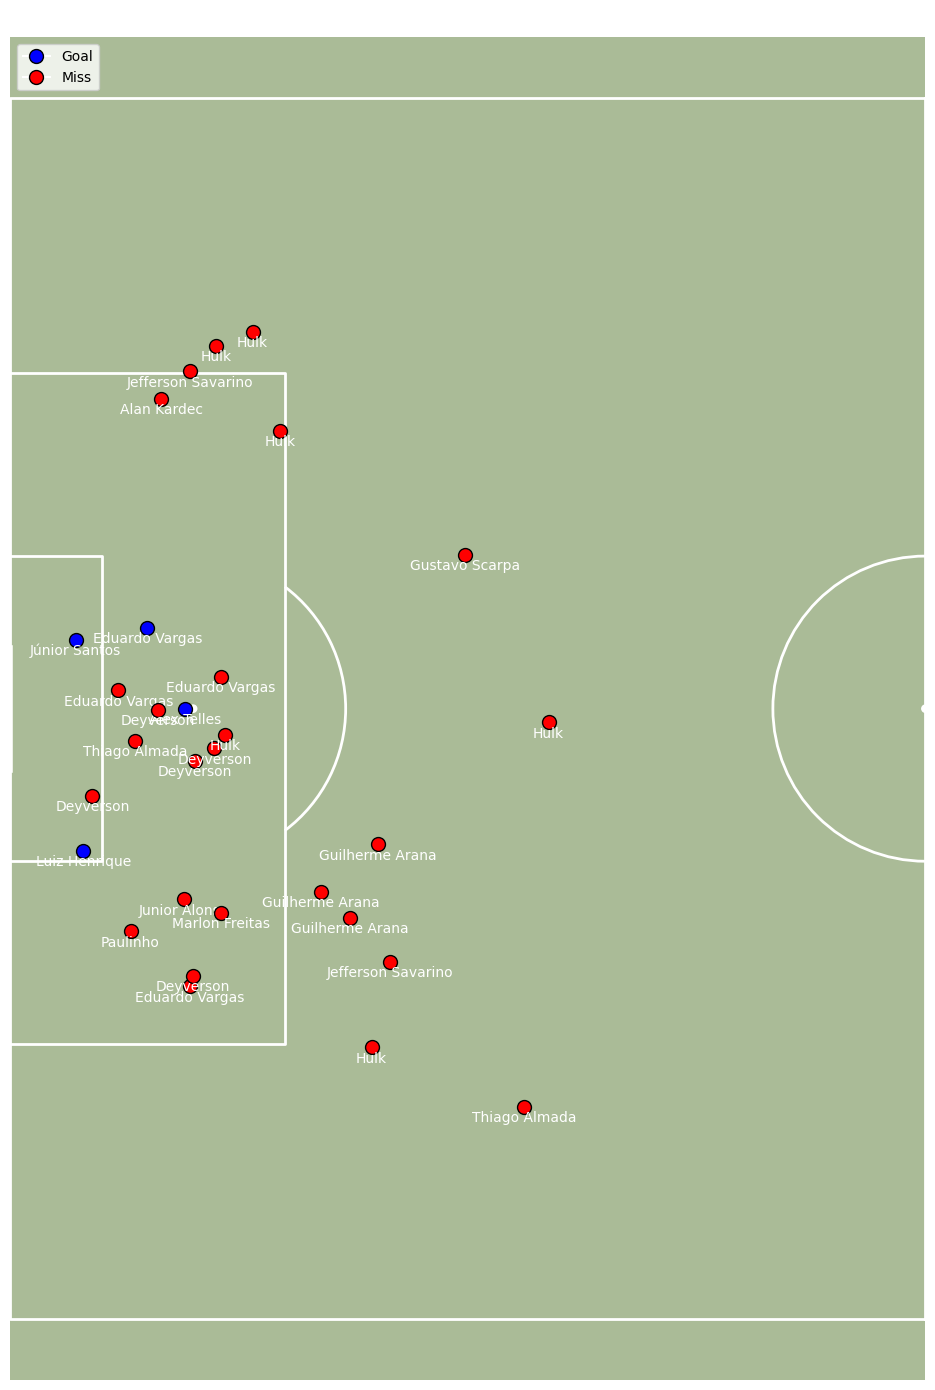

In [60]:
import json
import matplotlib.pyplot as plt
from mplsoccer import Pitch

# Carregar os dados do JSON
with open("shotmap.json", "r") as file:
    data = json.load(file)["shotmap"]

# Criar o campo de futebol
pitch = Pitch(pitch_color="#aabb97", line_color="#ffffff")
fig, ax = pitch.draw(figsize=(20, 14))

# Extrair coordenadas dos chutes e nomes dos jogadores
player_coords = [(shot["playerCoordinates"]["x"], shot["playerCoordinates"]["y"]) for shot in data]
player_names = [shot["player"]["name"] for shot in data]
shot_types = [shot["shotType"] for shot in data]

# Inverter as coordenadas Y em relação à linha central
pitch_height = 80  # Altura total do campo
center_line = pitch_height / 2
player_coords = [(x, 2 * center_line - y) for x, y in player_coords]

# Separar os chutes por tipo
goal_shots = [(coord, name) for coord, name, shot in zip(player_coords, player_names, shot_types) if shot == "goal"]
miss_shots = [(coord, name) for coord, name, shot in zip(player_coords, player_names, shot_types) if shot != "goal"]

# Fator de ajuste no eixo Y
y_adjustment = +10

# Adicionar os chutes de "Goal" no campo com ajuste
if goal_shots:
    for (x, y), name in goal_shots:
        y_adjusted = y + y_adjustment
        pitch.scatter([x], [y_adjusted], ax=ax, color='blue', edgecolors='black', s=100, label="Goal", zorder=3)
        ax.text(x, y_adjusted + 1, name, color='white', fontsize=10, ha='center')  # Nome do jogador

# Adicionar os chutes de "Miss" no campo com ajuste
if miss_shots:
    for (x, y), name in miss_shots:
        y_adjusted = y + y_adjustment
        pitch.scatter([x], [y_adjusted], ax=ax, color='red', edgecolors='black', s=100, label="Miss", zorder=3)
        ax.text(x, y_adjusted + 1, name, color='white', fontsize=10, ha='center')  # Nome do jogador

# Ajustar limites para cortar metade da imagem
ax.set_xlim(0, 60)  # Cortar metade direita (campo de 0 a 50 no eixo X)

# Adicionar título e legenda
ax.set_title("Shotmap de Futebol", fontsize=18, color='white')
# Criar uma legenda única
legend_elements = [
    plt.Line2D([0], [0], marker='o', color='w', label='Goal', markersize=10, markerfacecolor='blue', markeredgecolor='black'),
    plt.Line2D([0], [0], marker='o', color='w', label='Miss', markersize=10, markerfacecolor='red', markeredgecolor='black'),
]
ax.legend(handles=legend_elements, loc='upper left', fontsize=10)

# Mostrar o gráfico
plt.show()


## Informações do Mapa de chutes

Através do mapa de chutes, podemos visualizar claramente o comportamento desorganizado do Atlético em busca do gol. A equipe disparou uma quantidade considerável de finalizações, muitas delas com menos precisão, refletindo a tentativa de reagir ao placar adverso. Os 4 gols no total da partida (somando as duas equipes) surgiram dentro da grande área, com 3 deles sendo do Botafogo e 1 do Atlético, todos em posições próximas à meta do goleiro. Isso mostra que, apesar da pressão do Atlético, chutando de praticamente todas as partes do ataque, foi dentro da área que as chances mais claras de gol surgiram para ambas as equipes.

Em contraste, o Botafogo teve um número bem mais reduzido de chutes, alinhando-se com a postura mais cautelosa adotada durante a partida, especialmente após conseguir a vantagem no placar. As equipes se organizaram ofensivamente de formas distintas: enquanto o Atlético buscava a reação com intensidade e uma quantidade maior de finalizações, o Botafogo manteve um estilo de jogo mais controlado, com uma defesa sólida e poucas incursões no ataque.

Essas dinâmicas são refletidas nas estatísticas e gráficos anteriores, que mostram um Atlético mais agressivo e o Botafogo priorizando contra-ataques rápidos e a organização defensiva. A análise dos dados confirma a tentativa do Atlético de pressionar, mas também destaca a eficácia do Botafogo em limitar o número de oportunidades e minimizar os riscos.

# Heatmap dos principais destaques ofensivos das equipes na partida
## Luiz Henrique(Botafogo) x Hulk(Atlético-MG)

Na semana que antecedeu a final da Libertadores, os atletas Luiz Henrique e Hulk se envolveram em uma confusão durante a partida anterior, um episódio que intensificou ainda mais a rivalidade entre os dois times. Ambos, destaques absolutos de suas equipes ao longo da temporada, carregaram essa rivalidade para a decisão, onde novamente brilharam.

Assim como no restante do ano, Luiz Henrique e Hulk mostraram por que são considerados os pilares de seus times. Na final, ambos tiveram as maiores notas entre os atacantes, consolidando suas atuações como fundamentais para os rumos da partida. Suas performances foram marcadas por movimentações intensas, jogadas decisivas e uma constante ameaça às defesas adversárias.

Para entender melhor o impacto de cada um no jogo decisivo, vamos analisar o mapa de calor de Luiz Henrique e Hulk, explorando seu comportamento tático e técnico ao longo da partida.

## Heatmap Luiz Henrique

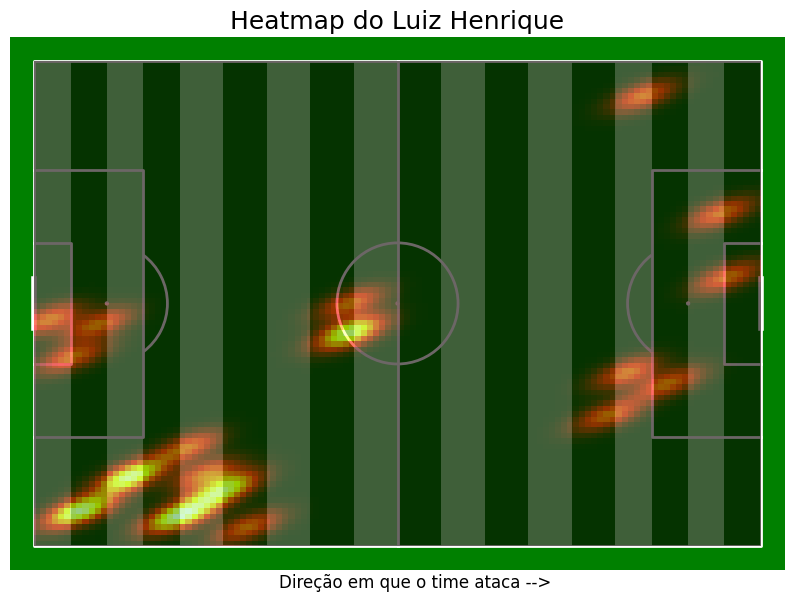

In [61]:
import requests
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
from mplsoccer import Pitch

# URL do heatmap de um jogador
url = "https://www.sofascore.com/api/v1/event/12375366/player/1035995/heatmap"

# Header simulando um navegador
header = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:134.0) Gecko/20100101 Firefox/134.0"
}

response = requests.get(url, headers=header)

if response.status_code == 200:
    data = response.json()
    heatmap_positions = data.get("heatmap", [])
    if heatmap_positions:
        x = [pos["x"] for pos in heatmap_positions]
        y = [pos["y"] for pos in heatmap_positions]

       # Ajuste no eixo Y
        y_adjust = -3
        y_adjust_above_mid = -6
        campo_largura = 90  # Largura máxima do campo (eixo Y)

        y = [coord + y_adjust + y_adjust_above_mid if coord > campo_largura / 2 else coord + y_adjust for coord in y]

        # Ajuste no eixo X
        x_adjust = 20
        campo_comprimento = 110  # Comprimento máximo do campo
        x = [coord + x_adjust if coord > campo_comprimento / 2  else coord for coord in x]


        # Inverter os pontos no eixo Y
        campo_largura = 90  # Largura máxima do campo
        y = [campo_largura - coord for coord in y]

        if len(x) > 1 and len(y) > 1:
            # Gerar heatmap
            kde = gaussian_kde([x, y], bw_method=0.1)
            xx, yy = np.mgrid[0:120:120j, 0:90:90j]  # Grid ajustado para 110x90
            zz = kde(np.vstack([xx.ravel(), yy.ravel()])).reshape(xx.shape)

            # Criar a figura e o campo usando o Pitch do mplsoccer
            pitch = Pitch(
                pitch_type='statsbomb',
                pitch_color='green',
                line_color='white',
                stripe= True,
                stripe_color= 'lightgreen'
            )
            fig, ax = plt.subplots(figsize=(10, 7))  # Tamanho da figura ajustado aqui
            pitch.draw(ax=ax)

            # Adicionando o heatmap ao campo
            pcm = ax.imshow(
                zz.T,
                extent=(0, 120, 0, 80),  # Ajuste para 110x90
                origin='lower',
                cmap='hot',
                alpha=0.6,
                zorder=2  # Aparece abaixo das linhas do campo
            )
            # Título
            ax.set_title("Heatmap do Luiz Henrique", fontsize=18, color='black')
            ax.text(campo_comprimento - 47, campo_largura - 3, 'Direção em que o time ataca -->',
            fontsize=12, color='black', ha='center')
            plt.show()
        else:
            print("Dados insuficientes para criar o mapa de calor.")
    else:
        print("Nenhuma posição encontrada no JSON.")
else:
    print(f"Erro na requisição: {response.status_code}")


# Informações retiradas do mapa de calor

As ações do ponta-direita Luiz Henrique na final da Libertadores ficaram concentradas principalmente no lado direito defensivo do campo, embora seja possível identificar algumas participações em outras áreas do gramado. Essa distribuição reflete diretamente as porcentagens de posse de bola da partida, entradas no último terço do campo, além do número de passes e finalizações realizadas pelas equipes.

Esse padrão de comportamento pode ser explicado por dois fatores principais. Primeiro, uma expulsão precoce obrigou Luiz Henrique a adotar uma postura mais defensiva, dando suporte ao seu lateral-direito e priorizando o equilíbrio tático da equipe. Segundo, a vantagem no placar também influenciou diretamente em seu posicionamento, já que o time buscava administrar o jogo e proteger sua defesa.

Apesar disso, Luiz Henrique não abandonou suas características ofensivas. Em um dos poucos momentos em que escapou pelo lado esquerdo do campo ofensivo, conseguiu transformar essa jogada em um gol crucial, evidenciando sua capacidade de adaptação e eficiência mesmo em situações adversas.

A análise do mapa de calor e das estatísticas demonstra como o jogador desempenhou um papel estratégico ao alternar entre funções defensivas e ofensivas, traduzindo a abordagem tática da equipe com inteligência e resultados.

## Heatmap Hulk

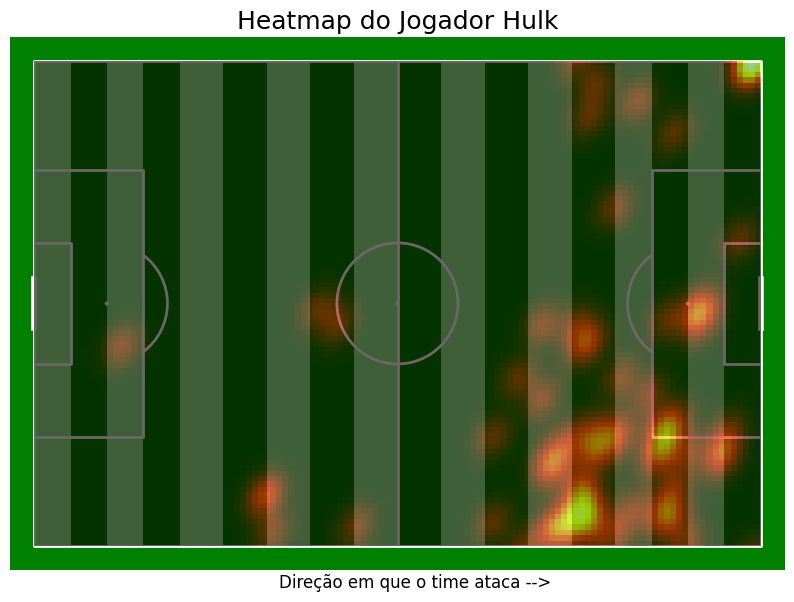

In [62]:
import requests
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
from mplsoccer import Pitch

# URL do heatmap de um jogador
url = "https://www.sofascore.com/api/v1/event/12375366/player/34705/heatmap"

# Header simulando um navegador
header = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:134.0) Gecko/20100101 Firefox/134.0"
}

response = requests.get(url, headers=header)

if response.status_code == 200:
    data = response.json()
    heatmap_positions = data.get("heatmap", [])
    if heatmap_positions:
        x = [pos["x"] for pos in heatmap_positions]
        y = [pos["y"] for pos in heatmap_positions]

       # Ajuste no eixo Y
        y_adjust = -3
        y_adjust_above_mid = -6
        campo_largura = 90  # Largura máxima do campo (eixo Y)

        y = [coord + y_adjust + y_adjust_above_mid if coord > campo_largura / 2 else coord + y_adjust for coord in y]

        # Ajuste no eixo X
        x_adjust = 20
        campo_comprimento = 110  # Comprimento máximo do campo
        x = [coord + x_adjust if coord > campo_comprimento / 2  else coord for coord in x]


        # Inverter os pontos no eixo Y
        campo_largura = 90  # Largura máxima do campo
        y = [campo_largura - coord for coord in y]

        if len(x) > 1 and len(y) > 1:
            # Gerar heatmap
            kde = gaussian_kde([x, y], bw_method=0.1)
            xx, yy = np.mgrid[0:120:120j, 0:90:90j]  # Grid ajustado para 110x90
            zz = kde(np.vstack([xx.ravel(), yy.ravel()])).reshape(xx.shape)

            # Criar a figura e o campo usando o Pitch do mplsoccer
            pitch = Pitch(
                pitch_type='statsbomb',
                pitch_color='green',
                line_color='white',
                stripe= True,
                stripe_color= 'lightgreen'    
            )
            fig, ax = plt.subplots(figsize=(10, 7))  # Tamanho da figura ajustado aqui
            pitch.draw(ax=ax)

            # Adicionando o heatmap ao campo
            pcm = ax.imshow(
                zz.T,
                extent=(0, 120, 0, 80),  # Ajuste para 110x90
                origin='lower',
                cmap='hot',
                alpha=0.6,
                zorder=2  # Aparece abaixo das linhas do campo
            )
            # Título
            ax.set_title("Heatmap do Jogador Hulk", fontsize=18, color='black')
            ax.text(campo_comprimento - 47, campo_largura - 3, 'Direção em que o time ataca -->',
            fontsize=12, color='black', ha='center')
            plt.show()
        else:
            print("Dados insuficientes para criar o mapa de calor.")
    else:
        print("Nenhuma posição encontrada no JSON.")
else:
    print(f"Erro na requisição: {response.status_code}")


# Informações retiradas do mapa de calor

As ações do ponta-direita Hulk na final da Libertadores ficaram concentradas principalmente no lado direito ofensivo da equipe, refletindo tanto a necessidade de buscar o placar quanto a vantagem numérica em campo. Em meio a uma pressão desorganizada do Atlético, Hulk se tornou a principal válvula de escape para o time, assumindo a responsabilidade de criar jogadas decisivas e liderar a tentativa de reação no placar.

Sua presença foi notável em entradas frequentes no centro da grande área adversária e em ações próximas à marca de escanteio do lado esquerdo ofensivo, evidenciadas pelos 6 a 0 no placar de escanteios a favor do Atlético. Foi justamente em um desses escanteios, cobrado com precisão por Hulk, que surgiu o gol de Vargas, marcado após uma assistência direta do atacante, reacendendo as esperanças de sua equipe na partida.

A movimentação intensa e estratégica de Hulk, destacada em seu mapa de calor, mostra como ele foi o ponto de referência do ataque atleticano. Sua capacidade de combinar força, técnica e visão de jogo foi fundamental para traduzir a pressão desorganizada nas oportunidades concretas, mantendo o Atlético vivo no confronto até os minutos finais.

# Conclusão

A análise dos dados de scouts da final da Libertadores entre Atlético-MG e Botafogo evidenciou a relevância estratégica dos dados no futebol, beneficiando treinadores, jogadores e equipes técnicas. Apesar de jogar com um jogador a menos, o Botafogo conseguiu equilibrar a combatitividade em campo, mantendo números próximos ao Atlético em duelos, interceptações e desarmes, o que foi essencial para superar a desvantagem numérica. Esse equilíbrio demonstra a resiliência e a organização da equipe carioca, mesmo sob pressão.

Embora o Atlético tenha dominado estatísticas como posse de bola, passes e finalizações, o Botafogo destacou-se pela eficiência ofensiva, convertendo 100% de suas grandes chances em gols e neutralizando muitas das investidas do adversário. O mapa de chutes foi uma ferramenta central para entender as dinâmicas ofensivas e defensivas das equipes, revelando que, enquanto o Atlético focou em intensidade e volume de finalizações, o Botafogo priorizou objetividade e eficiência. A análise desses padrões permitiu identificar áreas-chave de sucesso e falhas, como o baixo aproveitamento do Atlético mesmo em situações favoráveis.

Adicionalmente, o mapa de calor destacou o comportamento técnico e tático de jogadores como Luiz Henrique e Hulk, refletindo as estratégias adotadas por suas equipes. Luiz Henrique adaptou-se a um papel defensivo para suportar a desvantagem numérica, enquanto Hulk liderou o ataque do Atlético com movimentações intensas e jogadas decisivas. Compreender essas dinâmicas é crucial para ajustes futuros, desde estratégias táticas até melhorias nos treinos, demonstrando como os dados podem embasar decisões e aprimorar o desempenho coletivo e individual.
